In [2]:
# The Dataset was collected by scraping the HTML from IMDb with a Python script, to get insight into the movie industry, check correlation among each category of variables. It’s publicly available on Kaggle.com, maintained by Daniel Grijalva 


# Import needed packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [3]:
# reading the data
df = pd.read_csv(r'C:\Users\MJAAY\Desktop\Alex_portfolio_guide\movies.csv')

In [4]:
df.head(10)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
5,6000000.0,Hemdale,UK,Oliver Stone,Drama,138530565.0,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986
6,25000000.0,Henson Associates (HA),UK,Jim Henson,Adventure,12729917.0,Labyrinth,PG,1986-06-27,101,7.4,David Bowie,102879,Dennis Lee,1986
7,6000000.0,De Laurentiis Entertainment Group (DEG),USA,David Lynch,Drama,8551228.0,Blue Velvet,R,1986-10-23,120,7.8,Isabella Rossellini,146768,David Lynch,1986
8,9000000.0,Paramount Pictures,USA,Howard Deutch,Comedy,40471663.0,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,60565,John Hughes,1986
9,15000000.0,SLM Production Group,USA,David Cronenberg,Drama,40456565.0,The Fly,R,1986-08-15,96,7.5,Jeff Goldblum,129698,George Langelaan,1986


In [5]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

budget - 0%
company - 0%
country - 0%
director - 0%
genre - 0%
gross - 0%
name - 0%
rating - 0%
released - 0%
runtime - 0%
score - 0%
star - 0%
votes - 0%
writer - 0%
year - 0%


In [6]:

# Data Types for our columns

print(df.dtypes)

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object


In [7]:
# correct the released year
df['year_correct'] = df['released'].astype(str).str[:4]

In [8]:
df.head(5)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


In [9]:
# Sort the data according to cross revenue column
df = df.sort_values(by=['gross'], inplace = False, ascending=False)


In [10]:
# Change Budget and Cross columns data type to int

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [12]:
#display dataframe for better views to scroll through it
pd.set_option('display.max_rows', None)

In [13]:
# Sort the data according to cross revenue column
df = df.sort_values(by=['gross'], inplace = False, ascending=False)
df.head(5)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


In [14]:
# Drop Duplicates
df['company'].drop_duplicates().sort_values(ascending=False)
df = df.drop_duplicates()
df.head(5)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


In [15]:
df.head(5)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


<AxesSubplot:>

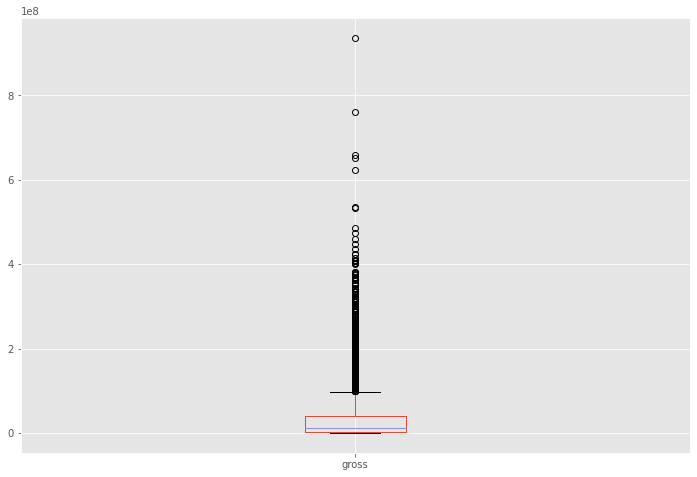

In [16]:
# Checking for any Outliers in gross colums?

df.boxplot(column=['gross'])

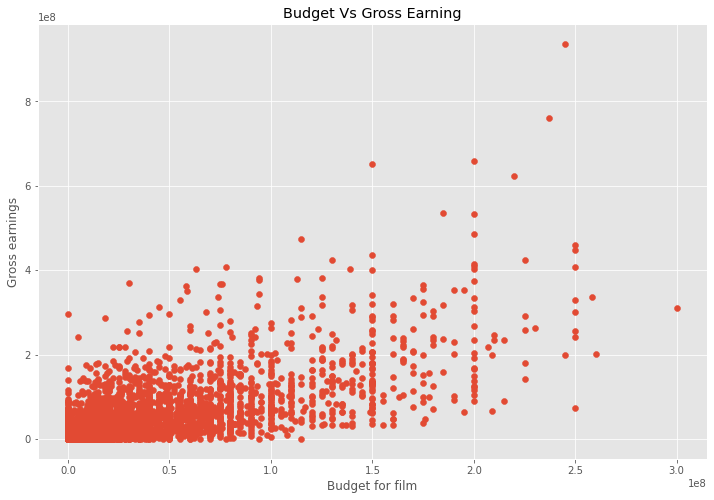

In [17]:
# Finding correlations
# scatter plot with budget Vs gross to check if there is correlation


plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget Vs Gross Earning') #adding title
plt.xlabel('Budget for film')
plt.ylabel('Gross earnings')
plt.show()

In [18]:
df.head(5)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


<AxesSubplot:xlabel='budget', ylabel='gross'>

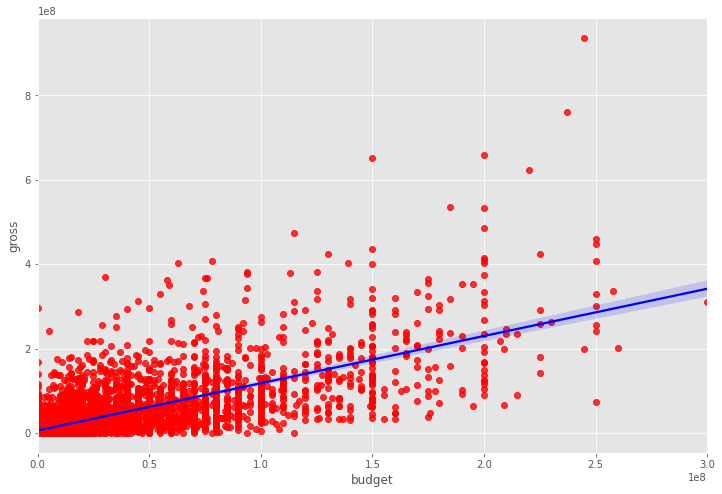

In [19]:
# budget Vs Gross using seaborn
sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [20]:
# Check for correlation with pearson / kendall / spearman
df.corr(method= 'pearson')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


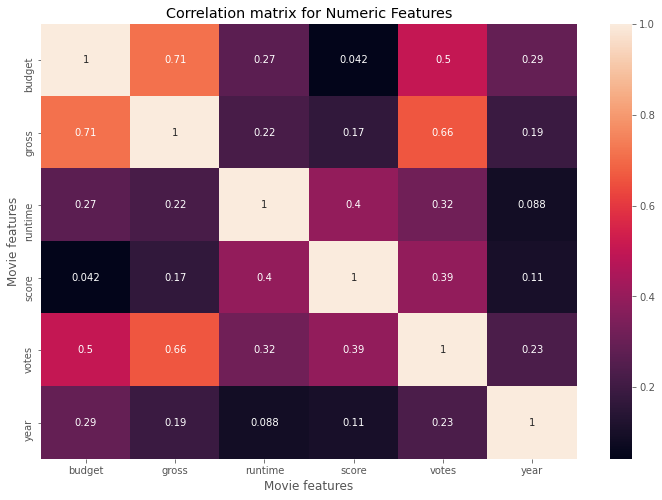

In [21]:
# Read the correlation via heatmap

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [22]:
# Using factorize - this assigns a random numeric value for each unique categorical value
# To check for correlation of each category

df2 = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
df2.head(5)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
budget,1.000000,0.095503,-0.028062,0.080629,0.119652,0.115788,0.117957,0.101400,0.059645,0.040488,0.004604,0.077698,0.119394,0.075271,-0.002140,-0.012925
company,0.095503,1.000000,0.344712,0.647567,0.070490,0.714419,0.702854,0.377810,0.313697,0.007934,-0.036871,0.580693,0.691879,0.645280,0.033327,0.038967
country,-0.028062,0.344712,1.000000,0.277133,-0.024093,0.279401,0.275837,0.241951,0.107884,0.028241,-0.164288,0.288864,0.266566,0.287553,-0.052244,-0.042272
director,0.080629,0.647567,0.277133,1.000000,0.072156,0.756448,0.743649,0.334473,0.376711,0.015257,0.050783,0.593230,0.743359,0.724076,0.094323,0.102663
genre,0.119652,0.070490,-0.024093,0.072156,1.000000,0.101394,0.102866,0.097025,0.073920,-0.003693,0.027134,0.083625,0.102707,0.072177,0.040547,0.030490


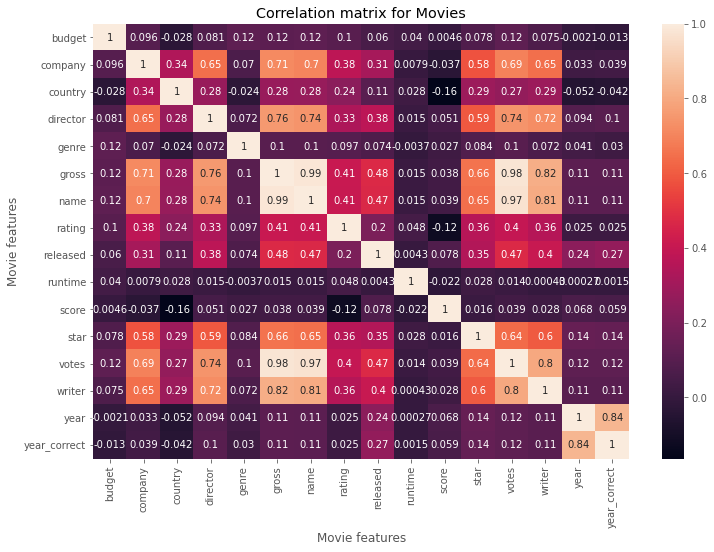

In [25]:
# Checking for correlation of each unique category previously converted to category type.

correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [29]:
# Unstack the variables/columns


correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

budget        budget          1.000000
              company         0.095503
              country        -0.028062
              director        0.080629
              genre           0.119652
              gross           0.115788
              name            0.117957
              rating          0.101400
              released        0.059645
              runtime         0.040488
              score           0.004604
              star            0.077698
              votes           0.119394
              writer          0.075271
              year           -0.002140
              year_correct   -0.012925
company       budget          0.095503
              company         1.000000
              country         0.344712
              director        0.647567
              genre           0.070490
              gross           0.714419
              name            0.702854
              rating          0.377810
              released        0.313697
              runtime    

In [30]:
#Sort the unstacked variables.
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

country       score          -0.164288
score         country        -0.164288
rating        score          -0.121917
score         rating         -0.121917
country       year           -0.052244
year          country        -0.052244
year_correct  country        -0.042272
country       year_correct   -0.042272
company       score          -0.036871
score         company        -0.036871
budget        country        -0.028062
country       budget         -0.028062
genre         country        -0.024093
country       genre          -0.024093
runtime       score          -0.022387
score         runtime        -0.022387
budget        year_correct   -0.012925
year_correct  budget         -0.012925
runtime       genre          -0.003693
genre         runtime        -0.003693
year          budget         -0.002140
budget        year           -0.002140
year          runtime         0.000274
runtime       year            0.000274
              writer          0.000426
writer        runtime    

In [31]:
# Let's look at the ones that have a high correlation (> 0.6)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.6]

print(strong_pairs)

votes         star            0.639584
star          votes           0.639584
company       writer          0.645280
writer        company         0.645280
company       director        0.647567
director      company         0.647567
name          star            0.648663
star          name            0.648663
              gross           0.657912
gross         star            0.657912
company       votes           0.691879
votes         company         0.691879
name          company         0.702854
company       name            0.702854
gross         company         0.714419
company       gross           0.714419
director      writer          0.724076
writer        director        0.724076
votes         director        0.743359
director      votes           0.743359
name          director        0.743649
director      name            0.743649
              gross           0.756448
gross         director        0.756448
votes         writer          0.799380
writer        votes      

In [26]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                              21322318408
Universal Pictures                        19430051320
Paramount Pictures                        17115702495
Twentieth Century Fox Film Corporation    14788570587
Walt Disney Pictures                      10455507123
Columbia Pictures                          8824216545
New Line Cinema                            8540112287
Columbia Pictures Corporation              7720114061
Touchstone Pictures                        6688156475
DreamWorks                                 5458121021
DreamWorks Animation                       4143974397
Metro-Goldwyn-Mayer (MGM)                  3384812932
Pixar Animation Studios                    3242024778
Fox 2000 Pictures                          3113861473
TriStar Pictures                           2967117827
Name: gross, dtype: int64

In [ ]:
## We can say Votes and budget have the highest correlation to gross earnings.

## Company has low correlation
